**Загрузка** **данных**

In [ ]:
import numpy as np
import pandas as pd

# Данные из варианта
X = np.array([5, 10, 25, 30, 40, 55, 70, 75, 90, 100])
Y_mean = np.array([52.6, 63, 90.75, 96, 107.6, 117, 116.75, 114.25, 103, 89.6])

**Линейная регрессия**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.DataFrame({'X': X, 'Y': Y_mean})

# Линейная регрессия
linear_model = smf.ols('Y ~ X', data=data).fit()
linear_pred = linear_model.predict(data['X'])
linear_eq = f"y = {linear_model.params['Intercept']:.2f} + {linear_model.params['X']:.2f}X"
print(linear_eq)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     5.509
Date:                Sat, 01 Jun 2024   Prob (F-statistic):             0.0469
Time:                        19:24:39   Log-Likelihood:                -42.027
No. Observations:                  10   AIC:                             88.05
Df Residuals:                       8   BIC:                             88.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7191     10.740      6.864      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Квадратичная регрессии**

In [ ]:
# Квадратичная регрессия
quadratic_model = smf.ols('Y ~ X + I(X**2)', data=data).fit()
quadratic_pred = quadratic_model.predict(data['X'])
quadratic_eq = f"y = {quadratic_model.params['Intercept']:.2f} + {quadratic_model.params['X']:.2f}X + {quadratic_model.params['I(X ** 2)']:.2f}X²"
print(quadratic_eq)

y = 40.52 + 2.47X + -0.02X²


**Кубическая регрессии**

In [ ]:
# Кубическая регрессия
cubic_model = smf.ols('Y ~ X + I(X**2) + I(X**3)', data=data).fit()
cubic_pred = cubic_model.predict(data['X'])
cubic_eq = f"y = {cubic_model.params['Intercept']:.2f} + {cubic_model.params['X']:.2f}X + {cubic_model.params['I(X ** 2)']:.2f}X² + {cubic_model.params['I(X ** 3)']:.6f}X³"
print(cubic_eq)

y = 40.70 + 2.45X + -0.02X² + -0.000003X³


**Экспоненциальная регрессия**

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Экспоненциальная регрессия
def exp_func(x, a, b):
    return np.exp(a * x + b)

popt, _ = curve_fit(exp_func, X, Y_mean, p0=(0.01, np.log(10)))
exp_pred = exp_func(X, *popt)
exp_eq = f"y = exp({popt[0]:.3f}X + {popt[1]:.2f})"

print(exp_eq)

y = exp(0.004X + 4.35)


**Построение графиков**

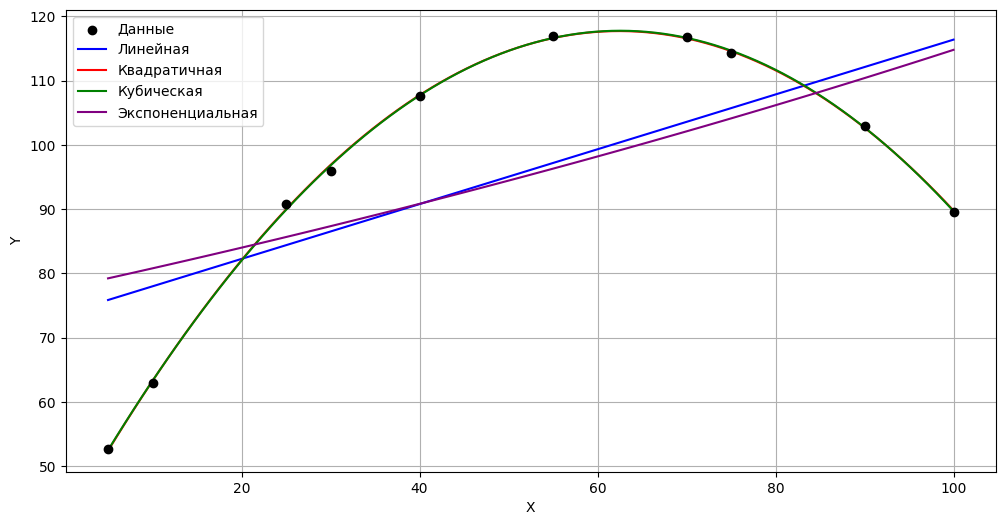

In [ ]:
# Более детальное построение графиков
X_fit = np.linspace(X.min(), X.max(), 100)
linear_fit = linear_model.predict(pd.DataFrame({'X': X_fit}))
quadratic_fit = quadratic_model.predict(pd.DataFrame({'X': X_fit}))
cubic_fit = cubic_model.predict(pd.DataFrame({'X': X_fit}))
exp_fit = exp_func(X_fit, a=popt[0], b=popt[1])

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(X, Y_mean, label='Данные', color='black', zorder=5)
plt.plot(X_fit, linear_fit, label='Линейная', color='blue')
plt.plot(X_fit, quadratic_fit, label='Квадратичная', color='red')
plt.plot(X_fit, cubic_fit, label='Кубическая', color='green')
plt.plot(X_fit, exp_fit, label='Экспоненциальная', color='purple')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

**График остатков для экспоненциальной модели**

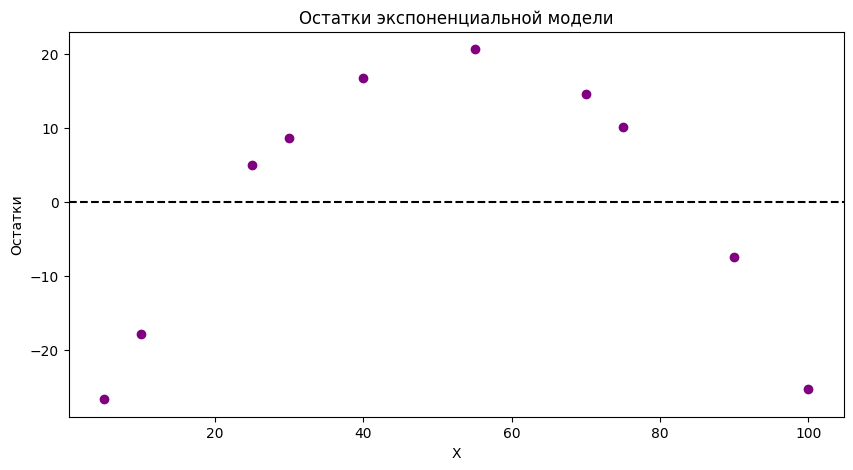

In [ ]:
# Остатки для экспоненциальной модели
residuals_exp = Y_mean - exp_pred
plt.figure(figsize=(10, 5))
plt.scatter(X, residuals_exp, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Остатки')
plt.title('Остатки экспоненциальной модели')
plt.show()

**Проверка адекватности линейной модели**

In [ ]:
print(linear_model.summary())
# Линейная модель не является адекватной так как R-squared достаточно мало по сравнению с 1

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     5.509
Date:                Sat, 01 Jun 2024   Prob (F-statistic):             0.0469
Time:                        20:12:16   Log-Likelihood:                -42.027
No. Observations:                  10   AIC:                             88.05
Df Residuals:                       8   BIC:                             88.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7191     10.740      6.864      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Проверка адекватности квадратичной модели и значимости ее коэффициентов**

In [ ]:
print(quadratic_model.summary())
# Квадратичная модель является адекватной так как R-squared равно 1 и Prob (F-statistic) < 0.05
# Все коэффициенты модели являются значимыми, так как все значения (P > |t|) < 0.05

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7893.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.83e-12
Time:                        20:15:22   Log-Likelihood:                -6.0392
No. Observations:                  10   AIC:                             18.08
Df Residuals:                       7   BIC:                             18.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5198      0.465     87.063      0.0

**Проверка адекватности кубической модели и значимости ее коэффициентов**

In [ ]:
print(cubic_model.summary())
# Кубическая модель является адекватной так как R-squared равно 1 и Prob (F-statistic) < 0.05
# Коэффициент X^3 не является значимым, так как (P > |t|) > 0.05

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4628.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.76e-10
Time:                        20:13:48   Log-Likelihood:                -5.9103
No. Observations:                  10   AIC:                             19.82
Df Residuals:                       6   BIC:                             21.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6992      0.672     60.553      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
